In [28]:
import numpy as np
import pandas as pd
import scipy.io
from matplotlib import pyplot as plt
import seaborn
import math

from os import listdir
from os.path import dirname, join

In [29]:
# fill the corresponding weight of a failing order by zero
def fill_missing_with_zero(reg_orders_and_weights):
    order_to_index = {(1,0,0):0, (1,0,1):1, (1,0,2):2, (1,0,3):3, (1,0,4):4, (1,0,5):5,
                      (2,0,0):6, (2,0,1):7, (2,0,2):8, (2,0,3):9, (2,0,4):10,(2,0,5):11,
                      (3,0,0):12,(3,0,1):13,(3,0,2):14,(3,0,3):15,(3,0,4):16,(3,0,5):17,
                      (4,0,0):18,(4,0,1):19,(4,0,2):20,(4,0,3):21,(4,0,4):22,(4,0,5):23,
                      (5,0,0):24,(5,0,1):25,(5,0,2):26,(5,0,3):27,(5,0,4):28,(5,0,5):29}
    
    # the orders are stored as a nested list of either list of ndarray, we need to make them all into nested lists
    reg_orders = reg_orders_and_weights[0]
    tmp = []
    for order in reg_orders:
        if isinstance(order[0],np.int64):
            tmp.append(tuple(order))
        else:
            tmp.append(tuple(order[0]))
    reg_orders =tmp
    
    # the weights are stored as a nested list of either list of ndarray, we need to make them all into nested lists
    reg_weights = reg_orders_and_weights[1]
    if len(reg_weights)==1:
        reg_weights = reg_weights.tolist()[0]
    else:
        reg_weights = reg_weights.tolist()
    
    # filling up the missing orders and make the corresponding weights zero
    for order in order_to_index:
        if not order in reg_orders:
            reg_weights.insert(order_to_index[order],0)
            reg_orders.insert(order_to_index[order],order)
    
    return reg_orders,reg_weights

In [30]:
# making correspondence between a certain row to a subject ID (this is for potential later usage)
# row_num_to_subID[r] stores the ID of the subject whose data is stored in row r
row_to_subID = {}

In [31]:
file_dir = 'E:/projects/connectome/results/run1/ensemble_orders_and_weights'
file_names = listdir(file_dir)

all_orders = []
all_weights = []

for i,file_name in enumerate(file_names):
    ID_num = file_name[-10:-4]
    subject_ID = 'sub'+ID_num
    
    # putting row num into 1-to-1 correspondence to subject ID
    row_to_subID[i]=ID_num
    
    
    file = join(file_dir,file_name)
    sub_orders_and_weights = scipy.io.loadmat(file)['ensemble_orders_and_weights']
    
    sub_orders = []
    sub_weights = []
    
    for reg in range(160):
        reg_orders, reg_weights = fill_missing_with_zero(sub_orders_and_weights[reg])
        sub_orders.append(reg_orders)
        sub_weights.append(reg_weights)
    
    all_orders.append(sub_orders)
    all_weights.append(sub_weights)

In [32]:
# make all_weights into a 2D array as it was an messy embeding of ndarray and array
tmp = [[None for _ in range(160)] for _ in range(len(all_orders))]
for sub in range(len(all_orders)):
    for reg in range(160): 
        if not isinstance(all_weights[sub][reg][0],float) and not isinstance(all_weights[sub][reg][0],int):
            if not isinstance(all_weights[sub][reg][0][0],float) and not isinstance(all_weights[sub][reg][0][0],int):
                if not isinstance(all_weights[sub][reg][0][0],float) and not isinstance(all_weights[sub][reg][0][0],int):
                    if not isinstance(all_weights[sub][reg][0][0][0],float) and not isinstance(all_weights[sub][reg][0][0][0],int):
                        tmp[sub][reg] = [all_weights[sub][reg][i][0][0] for i in range(30)] 
                else:
                    tmp[sub][reg] = [all_weights[sub][reg][i][0] for i in range(30)]
            else:
                tmp[sub][reg] = [all_weights[sub][reg][i] for i in range(30)]
        else:
            tmp[sub][reg] = all_weights[sub][reg]

In [33]:
# make all_weights into a 2D array as it was an messy embedded data type of ndarray and array
tmp = [[None for _ in range(160)] for _ in range(len(all_orders))]
for sub in range(len(all_orders)):
    for reg in range(160): 
        if not isinstance(all_weights[sub][reg][0],float) and not isinstance(all_weights[sub][reg][0],int):
            tmp[sub][reg] = [all_weights[sub][reg][i][0][0] for i in range(30)] 
        else:
            tmp[sub][reg] = all_weights[sub][reg]
all_weights = tmp

In [34]:
all_weights = np.array(all_weights) 
all_weights_mat = 'E:/projects/connectome/results/run1/all_weights.mat'
scipy.io.savemat(all_weights_mat,mdict={'all_weights':all_weights})

In [35]:
for sub in range(len(all_weights)):
    for reg in range(len(all_weights[0])):
        if len(all_orders[sub][reg])<30:
            print('{},{}:{}'.format(sub,reg,len(all_orders[sub][reg])))

# Heat map of model orders with highest predicting power (AIC)

## Summing p and q

#### Here we look at the sum of p and q of the model with the highest AIC in each region and subject

In [9]:
order_sum_of_best_model = []

In [10]:
for sub in range(len(all_weights)):
    tmp = []
    for reg in range(len(all_weights[0])):
        max_weight = max(all_weights[sub][reg])
        all_weights_sub_reg = all_weights[sub][reg].tolist()
        max_weight_index = all_weights_sub_reg.index(max_weight)
        tmp.append(sum(all_orders[sub][reg][max_weight_index]))
    order_sum_of_best_model.append(tmp)

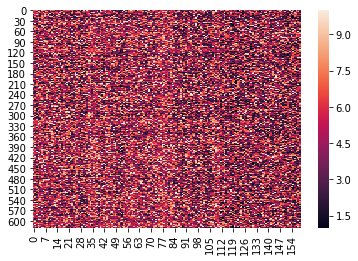

In [11]:
seaborn.heatmap(order_sum_of_best_model)
plt.show()

## Looking at just p

In [13]:
p_of_best_model = []

In [14]:
for sub in range(len(all_weights)):
    tmp = []
    for reg in range(len(all_weights[0])):
        max_weight = max(all_weights[sub][reg])
        all_weights_sub_reg = all_weights[sub][reg].tolist()
        max_weight_index = all_weights_sub_reg.index(max_weight)
        tmp.append(all_orders[sub][reg][max_weight_index][0])
    p_of_best_model.append(tmp)

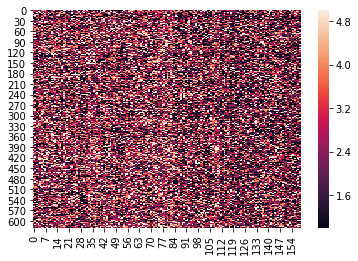

In [15]:
seaborn.heatmap(p_of_best_model)
plt.show()

## Looking at just q

In [16]:
q_of_best_model = []

In [17]:
for sub in range(len(all_weights)):
    tmp = []
    for reg in range(len(all_weights[0])):
        max_weight = max(all_weights[sub][reg])
        all_weights_sub_reg = all_weights[sub][reg].tolist()
        max_weight_index = all_weights_sub_reg.index(max_weight)
        tmp.append(all_orders[sub][reg][max_weight_index][2])
    q_of_best_model.append(tmp)

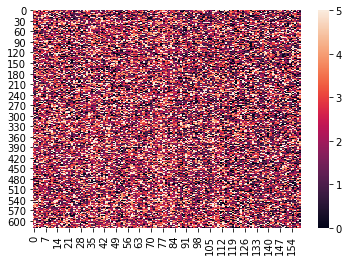

In [18]:
seaborn.heatmap(q_of_best_model)
plt.show()

## Subject versus Model

#### Here we sum up the weights of a certain model across all regions for each subject. This is to see if certain model has higher overall weights than other regions across subjects.

In [36]:
sub_vs_model = []

for sub in range(len(all_orders)):
    weight_sums_for_models = []
    for model in range(30):
        # summing weights of the sme model across all region
        weight_sum_across_reg = sum(list(all_weights[sub][i][model] for i in range(160)))  
        weight_sums_for_models.append(weight_sum_across_reg)
    sub_vs_model.append(weight_sums_for_models)
    
# fix the type issues again in order to be able to plot the heat map 
# here we are making sure that each entry in sub_vs_model is of type "float" instead of type "array([numpy.float64])"
for sub in range(len(all_orders)):
    for model in range(30): 
        if not isinstance(sub_vs_model[sub][model],float):
            sub_vs_model[sub][model] = float(sub_vs_model[sub][model][0][0])

In [37]:
sub_vs_model = pd.DataFrame(sub_vs_model)

order_to_index = {(1,0,0):0, (1,0,1):1, (1,0,2):2, (1,0,3):3, (1,0,4):4, (1,0,5):5,
                      (2,0,0):6, (2,0,1):7, (2,0,2):8, (2,0,3):9, (2,0,4):10,(2,0,5):11,
                      (3,0,0):12,(3,0,1):13,(3,0,2):14,(3,0,3):15,(3,0,4):16,(3,0,5):17,
                      (4,0,0):18,(4,0,1):19,(4,0,2):20,(4,0,3):21,(4,0,4):22,(4,0,5):23,
                      (5,0,0):24,(5,0,1):25,(5,0,2):26,(5,0,3):27,(5,0,4):28,(5,0,5):29}

model_col_names = [model for model in order_to_index]
sub_vs_model.columns= model_col_names

[]

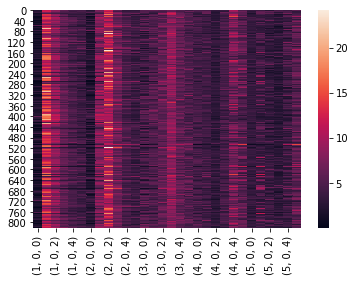

In [38]:
seaborn.heatmap(sub_vs_model)
plt.plot()

## Region versus Model

In [39]:
reg_vs_model = []

for reg in range(160):
    weight_sums_for_models = []
    for model in range(30):
        # summing weights of the same model across all subjects
        weight_sum_across_sub = sum(list(all_weights[i][reg][model] for i in range(len(all_orders))))  
        weight_sums_for_models.append(weight_sum_across_sub)
    reg_vs_model.append(weight_sums_for_models)
    
# fix the type issues again in order to be able to plot the heat map 
# here we are making sure that each entry in sub_vs_model is of type "float" instead of type "array([numpy.float64])"
for reg in range(160):
    for model in range(30): 
        if not isinstance(reg_vs_model[reg][model],float):
            reg_vs_model[reg][model] = float(reg_vs_model[reg][model][0][0])

In [40]:
reg_vs_model = pd.DataFrame(reg_vs_model)
reg_vs_model.columns = model_col_names

[]

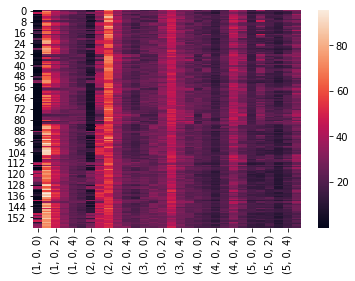

In [41]:
seaborn.heatmap(reg_vs_model)
plt.plot()

## Weight Heatmap for each model

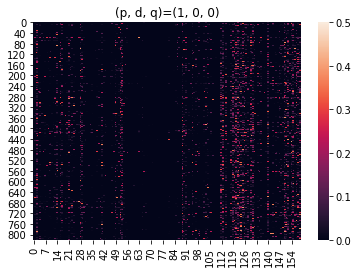

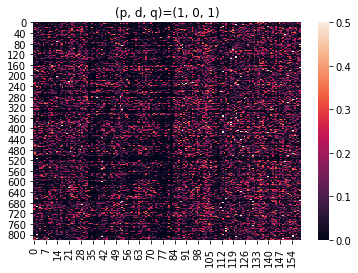

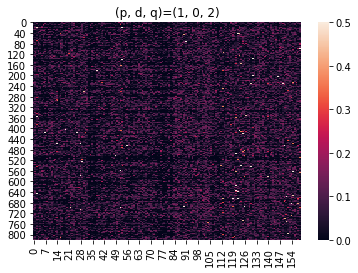

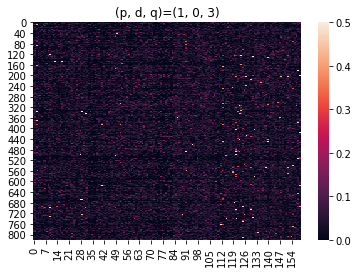

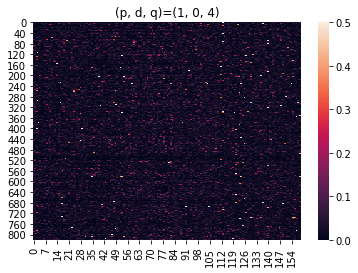

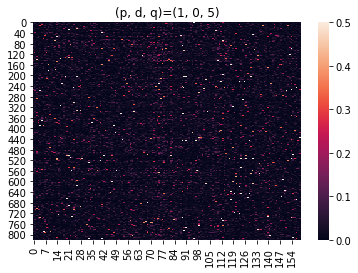

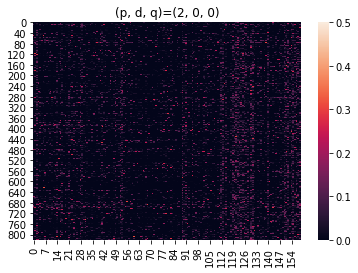

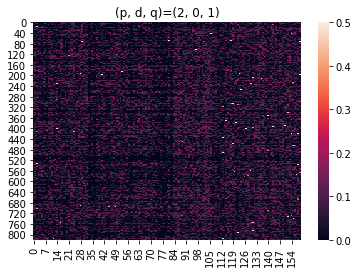

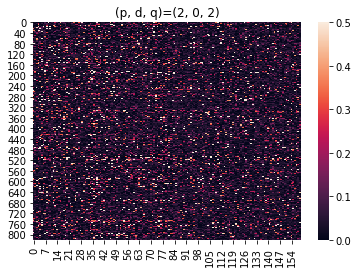

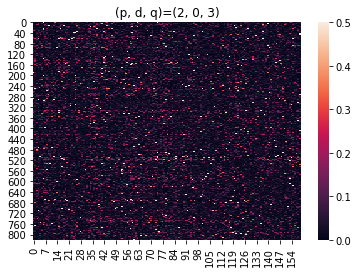

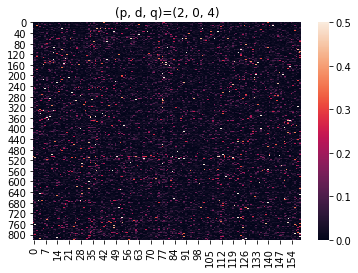

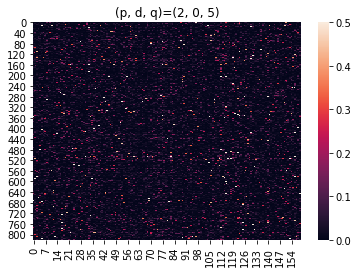

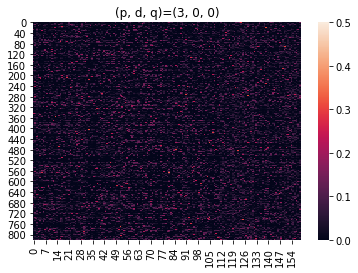

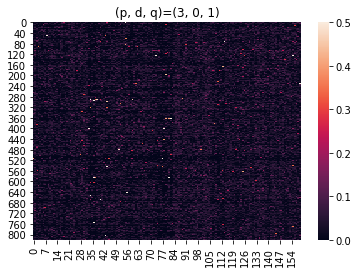

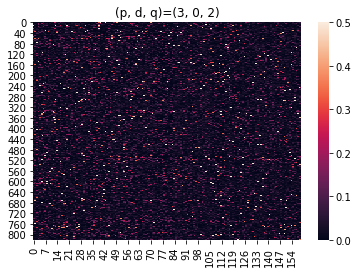

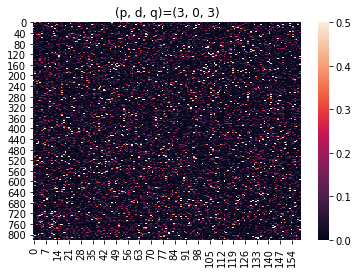

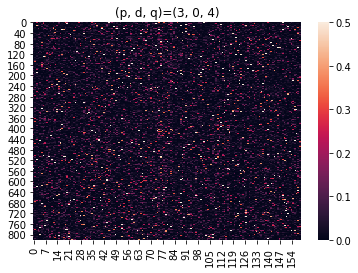

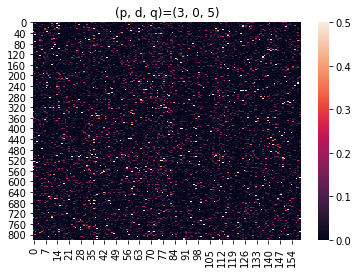

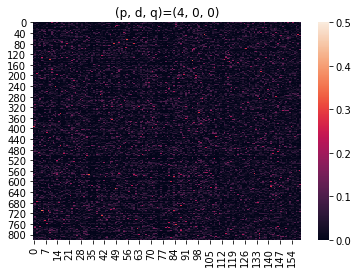

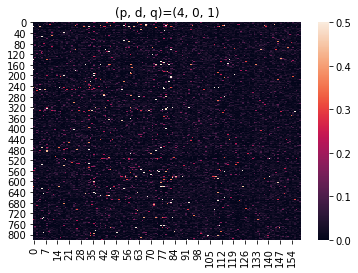

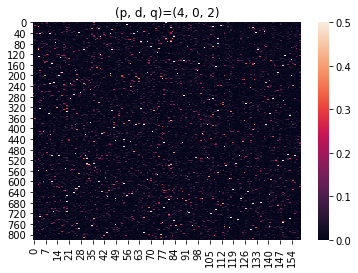

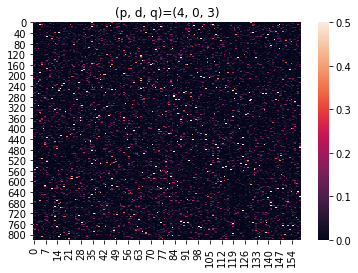

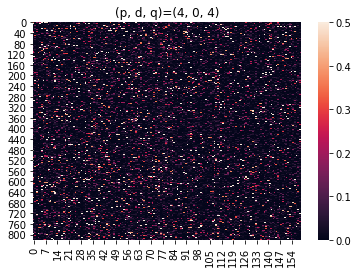

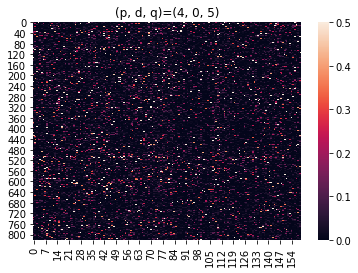

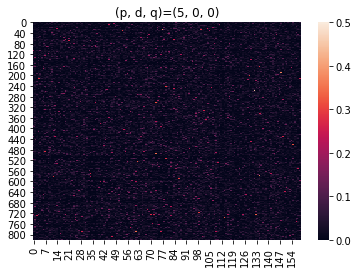

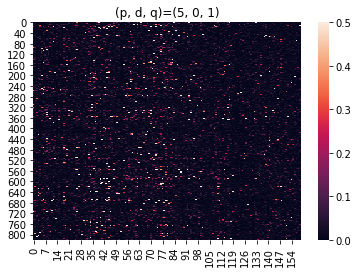

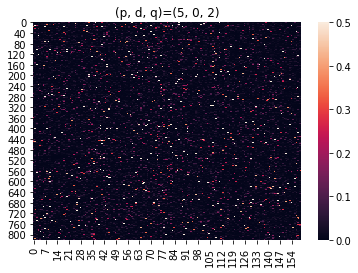

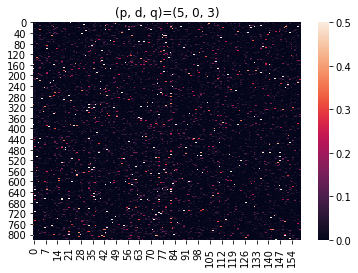

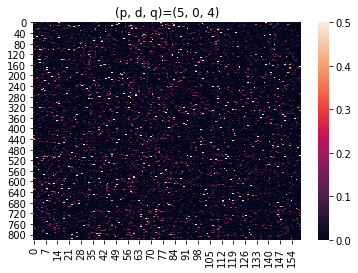

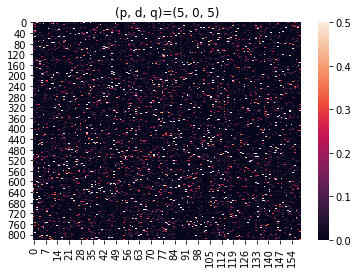

In [42]:
for model in range(30):
    model_weights_matrix = []
    for sub in range(len(all_orders)):
        sub_weight_of_regions = [all_weights[sub][i][model] for i in range(160)]
        model_weights_matrix.append(sub_weight_of_regions)
    
    seaborn.heatmap(model_weights_matrix,vmin=0,vmax=0.5)
    plt.title('(p, d, q)='+str(model_col_names[model]))
    plt.show()
           

#### Heatmaps for the models with p=q are the brightest, which kind of makes sense: we need to both consider the trend and deviation from the mean as a whole package when we add a term into the ARMA model.

## Mean and standard deviation of weights for each model

In [42]:
model_mean = []
model_std = []

for model in range(30):
    model_weights_matrix = []
    for sub in range(820):
        sub_weight_of_regions = [all_weights[sub][i][model] for i in range(160)]
        model_weights_matrix.append(sub_weight_of_regions)
    
    model_mean.append(np.mean(model_weights_matrix))
    model_std.append(np.std(model_weights_matrix))

In [46]:
mean,std = pd.DataFrame(model_mean),pd.DataFrame(model_std)
res = pd.concat([mean,std],axis=1,sort=False)
res.columns = ['model_mean','model_std']
row_names = {}
for i in range(30):
    row_names[i] = model_col_names[i]

In [47]:
res = res.rename(index=row_names).T

In [48]:
res.T

model_mean  model_std
(1, 0, 0)    0.011284   0.041473
(1, 0, 1)    0.068558   0.093193
(1, 0, 2)    0.048304   0.057020
(1, 0, 3)    0.035184   0.045145
(1, 0, 4)    0.028809   0.047739
(1, 0, 5)    0.025629   0.059245
(2, 0, 0)    0.016383   0.038335
(2, 0, 1)    0.044221   0.053110
(2, 0, 2)    0.072471   0.127925
(2, 0, 3)    0.043457   0.076669
(2, 0, 4)    0.030648   0.058840
(2, 0, 5)    0.025623   0.061400
(3, 0, 0)    0.028261   0.042452
(3, 0, 1)    0.029809   0.038783
(3, 0, 2)    0.038185   0.079548
(3, 0, 3)    0.053188   0.111874
(3, 0, 4)    0.037208   0.077990
(3, 0, 5)    0.031489   0.077328
(4, 0, 0)    0.026170   0.032547
(4, 0, 1)    0.026309   0.056572
(4, 0, 2)    0.019066   0.059236
(4, 0, 3)    0.027618   0.072286
(4, 0, 4)    0.046062   0.118293
(4, 0, 5)    0.035335   0.096799
(5, 0, 0)    0.020108   0.026310
(5, 0, 1)    0.028496   0.082787
(5, 0, 2)    0.023893   0.081241
(5, 0, 3)    0.017911   0.066582
(5, 0, 4)    0.025102   0.079416
(5, 0, 5)    0.035221   0.109727

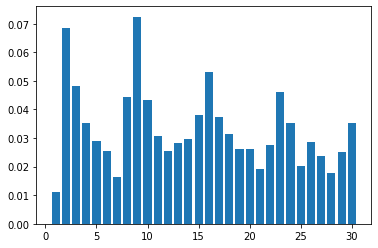

In [50]:
plt.bar(range(1,31), model_mean, align='center')
plt.show()

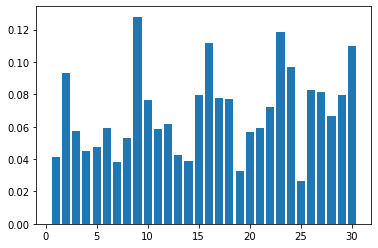

In [51]:
plt.bar(range(1,31),model_std, align='center')
plt.show()

#### Models with high p=q has both high mean and standard deviation. We continue the investigation to see if those regions would take over other regions so that in future computation we need only those models with p=q. If this is the case, we can greatly increase the range of models considered.

## Model ranks

#### We look at the rank of each model among all 30 models for each region and subjects. 
#### The brighter the color, the higher the rank.

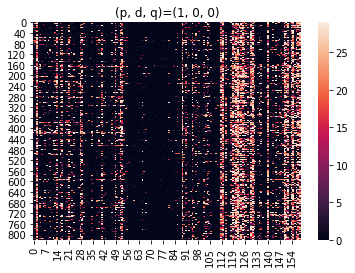

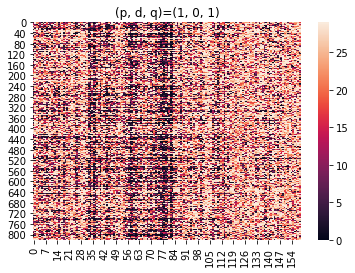

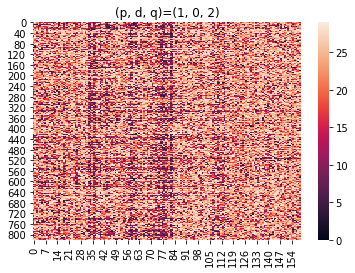

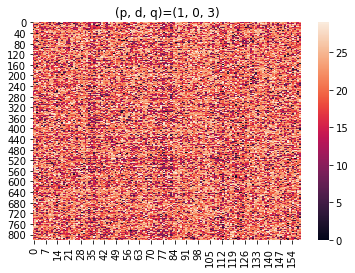

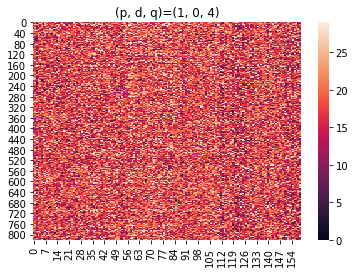

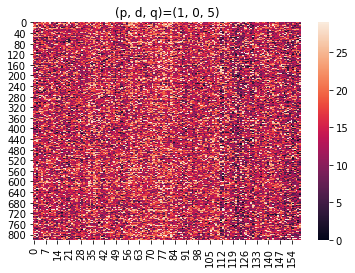

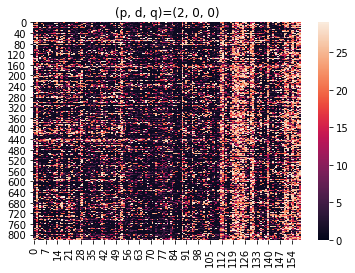

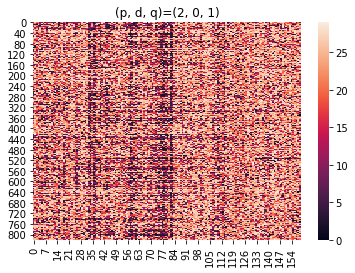

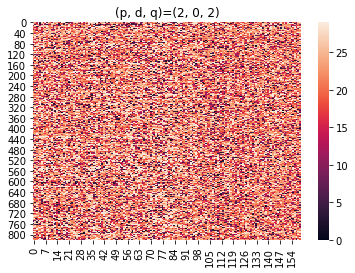

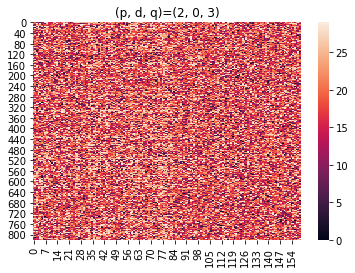

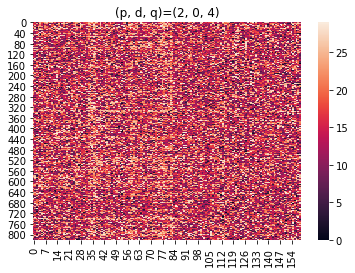

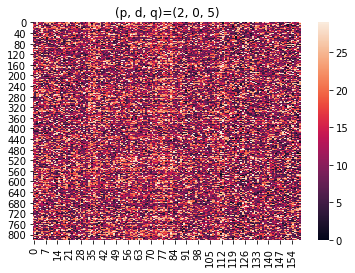

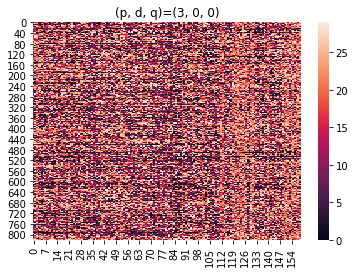

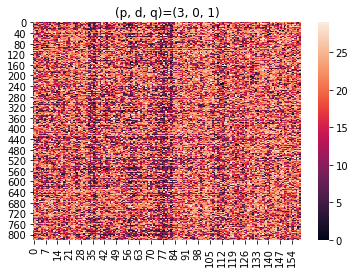

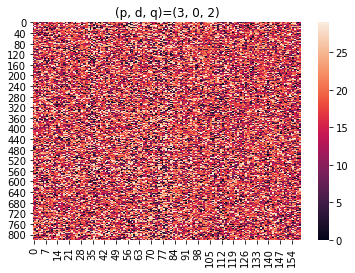

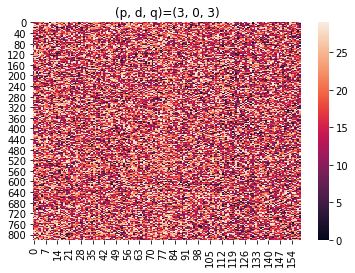

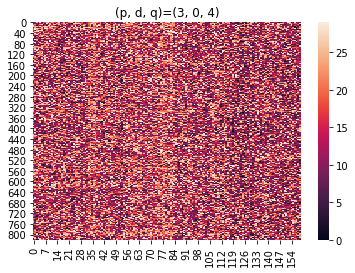

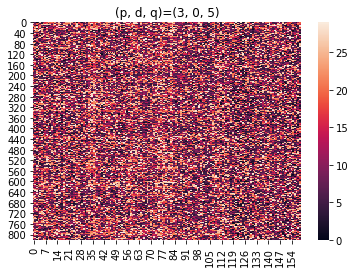

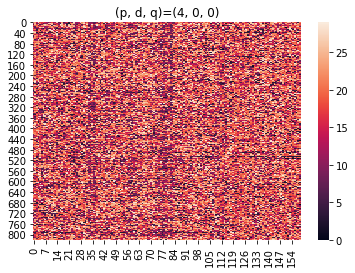

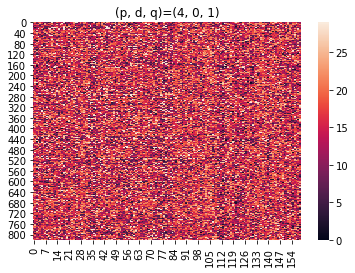

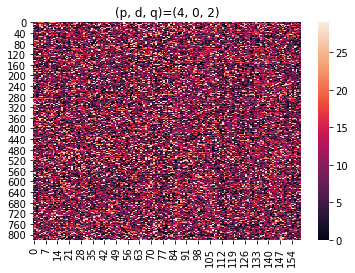

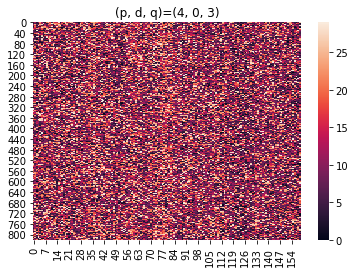

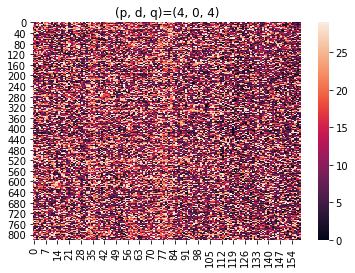

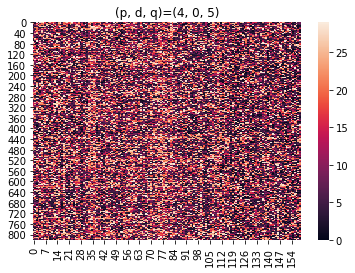

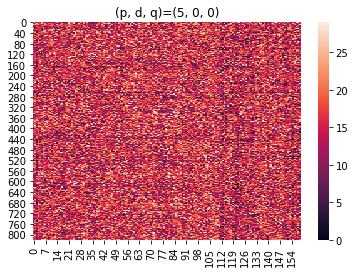

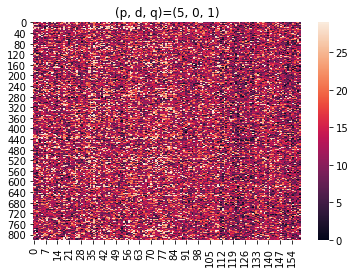

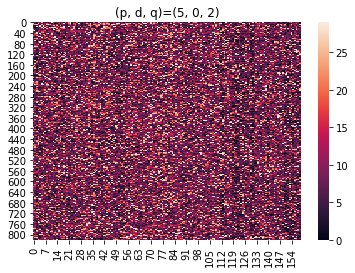

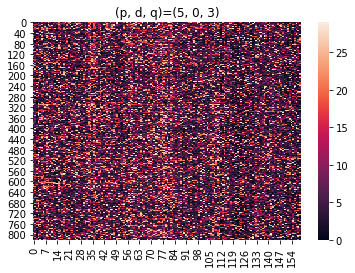

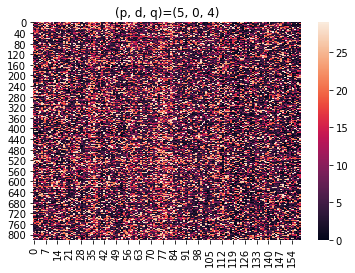

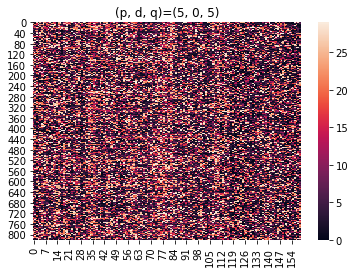

In [35]:
model_ranks = []
for model in range(30):
    # model_rank_matrix[sub][reg] stores the rank (by weight) of the model (among all fitted models) for a region of a subject
    model_rank_matrix = [[None for _ in range(160)] for _ in range(820)]
    for sub in range(820):
        for reg in range(160):
            # sorted in ascending order, so brighter color means higher rank
            model_rank_matrix[sub][reg] = sorted(all_weights[sub][reg]).index(all_weights[sub][reg][model])   
    
    seaborn.heatmap(model_rank_matrix)
    plt.title('(p, d, q)='+str(model_col_names[model]))
    plt.show()

#### Heatmap summarization of whether each model makes to the top 5 most important models and has a weight greater than 0.2 for each region of each subject

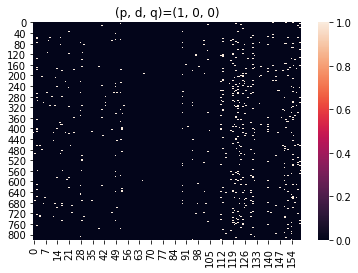

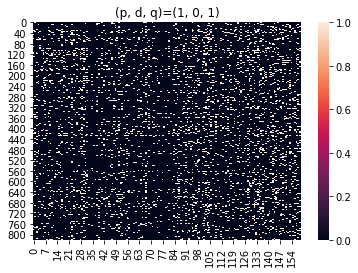

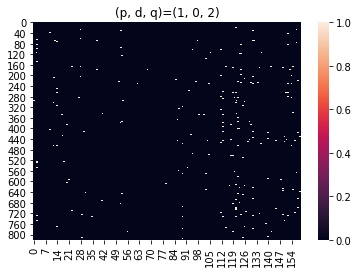

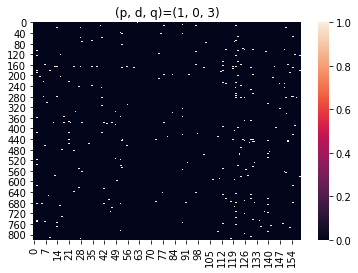

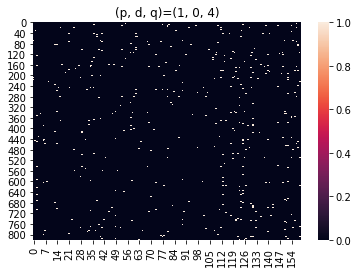

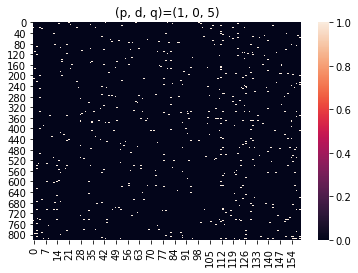

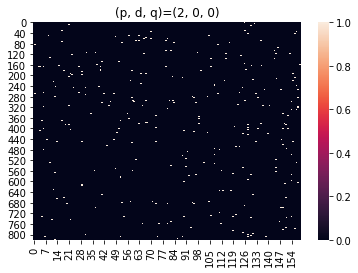

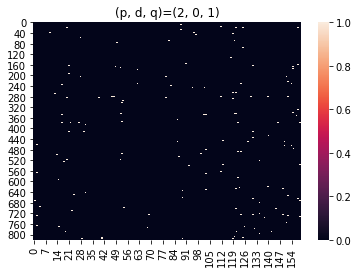

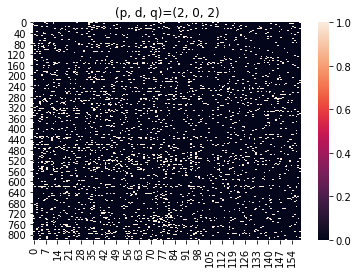

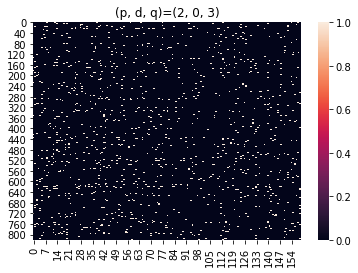

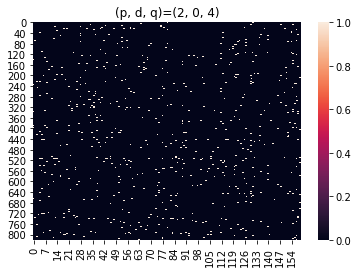

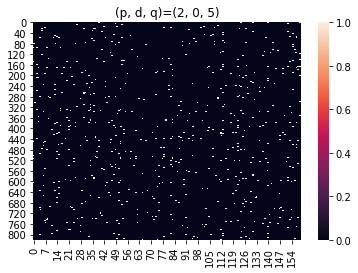

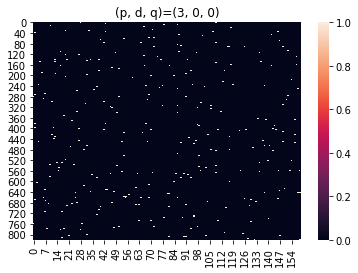

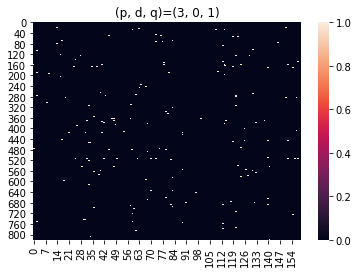

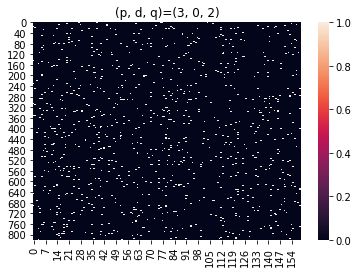

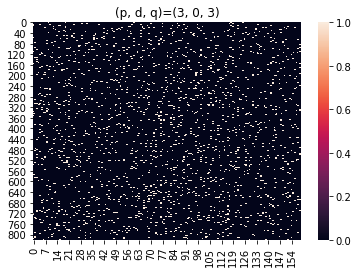

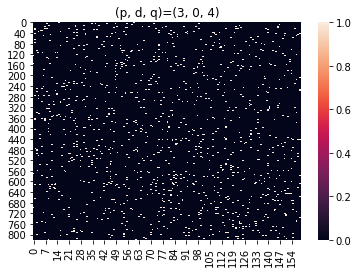

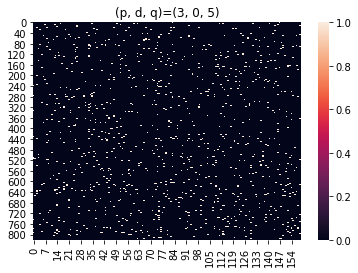

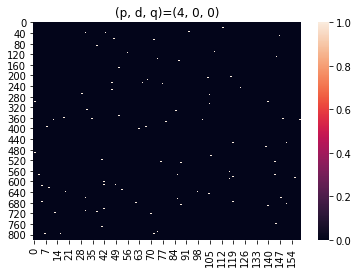

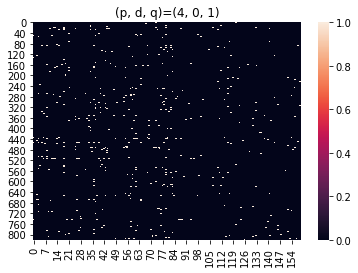

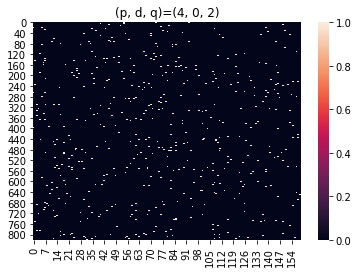

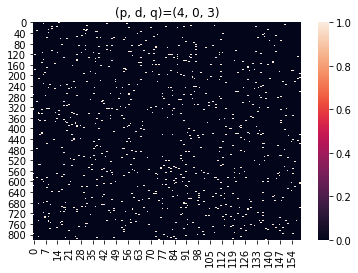

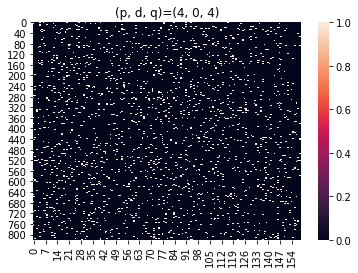

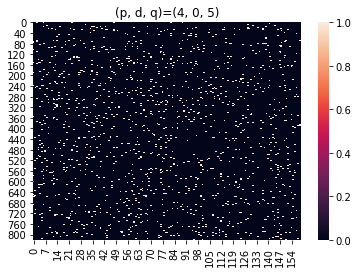

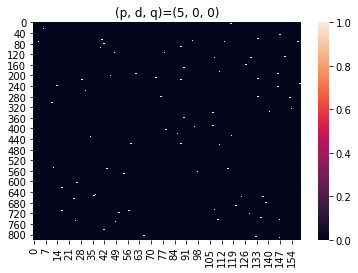

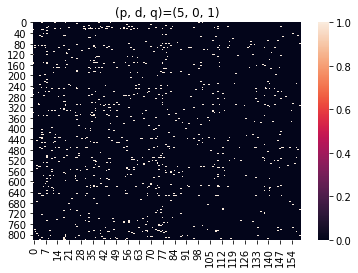

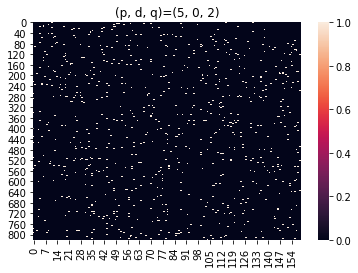

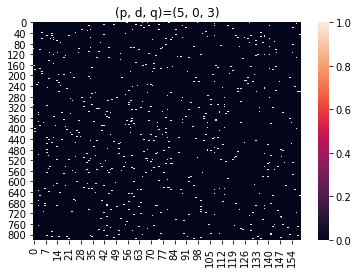

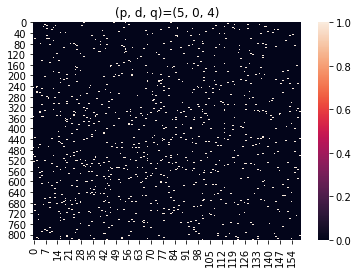

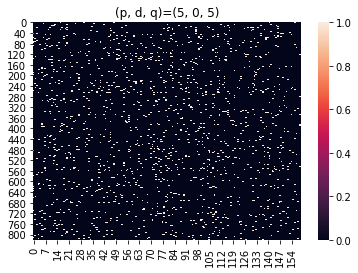

In [36]:
for model in range(30):
    # model_significance_matrix contains binary-valued entries of whether this model (among all 30 models) has high-rank (top-5)
    # and significant weight (>0.2)
    model_significance_matrix = [[None for _ in range(160)] for _ in range(820)]
    for sub in range(820):
        for reg in range(160):
            # sorted in ascending order, so brighter color means higher rank
            model_significance_matrix[sub][reg]= 1 if (sorted(all_weights[sub][reg]).index(all_weights[sub][reg][model])>=25 and all_weights[sub][reg][model]>0.2) else 0   
    seaborn.heatmap(model_significance_matrix)
    plt.title('(p, d, q)='+str(model_col_names[model]))
    plt.show()

#### Split models into two groups: 
#### group A:  p=q or q=0
#### group B: others

If any of the group B models has a top 5 greatest weight and whose weight is > 0.2, then that cell in the heat map gets a one.

In [37]:
# index of the models with either p=q or q=0
groupA = [0,1,6,8,12,15,18,22,24,29]

# model_importance_matrices[i] is a matrix of binary values for the model with index i. 
# Each entry of model_importance_matrices[i] correponds to a region of a subject. 
# Each entry of model_importance_matrices[i] is a logical-and sum of three criteria:
# (1) the model belongs to group B (or not belongs to group A)
# (2) the model's weight in that region (of that subject) is ranked top-5 for all models for that region (of that subject)
# (3) the model's weight in that region (of that subject) is greater than 0.2 
model_importance_matrices = []

for model in range(30):
    model_importance_matrix = [[None for _ in range(160)] for _ in range(820)]
    for sub in range(820):
        for reg in range(160):
            # sorted in ascending order, so brighter color means higher rank
            model_importance_matrix[sub][reg]= 1 if (model not in groupA and sorted(all_weights[sub][reg]).index(all_weights[sub][reg][model])>=25 and all_weights[sub][reg][model]>0.2) else 0   
    
    model_importance_matrices.append(model_importance_matrix)



In [38]:
# determine which region of a subject belongs to groupB and satisfies the significance criteria
groupB_significance_result = [[0 for _ in range(160)] for _ in range(820)]

for i in range(30):
    for sub in range(820):
        for reg in range(160):
            groupB_significance_result[sub][reg] |= model_importance_matrices[i][sub][reg]

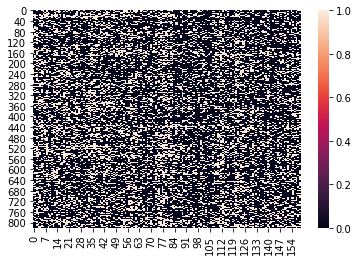

In [39]:
seaborn.heatmap(groupB_significance_result)
plt.show()